In [1]:
#D38：探索性資料分析 (EDA) 遺失值與異常值的進階補值策略(4/28更新)

## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [2]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [3]:
df_train = pd.read_csv("Titanic_train.csv")

In [4]:
# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_train= df_train.replace('null',np.NaN)

# 統計 data 裡每一列是否有空值
print(df_train.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


## 觀察 Age

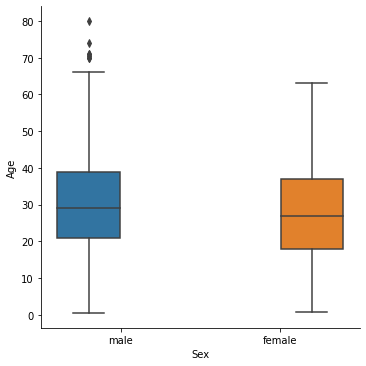

In [5]:
#step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
g = sns.catplot(x="Sex", y="Age", hue="Sex",
               data=df_train,kind="box")

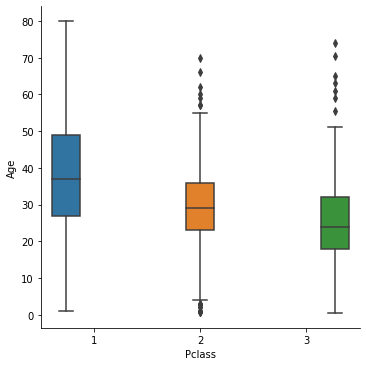

In [6]:
g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train,kind="box")

In [7]:
#離散轉連續型資料
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [8]:
#處理資料（把不需要的資訊刪除）
df_train = df_train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,NaN,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [9]:
#計算資料點的倆倆距離
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(df_train)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,66.055004,4.843101,47.814459,13.661625,5.602039,55.274543,25.399422,10.539451,25.860953,...,881.069473,882.007183,883.027498,884.005679,885.448765,886.033895,887.300717,949.472900,889.303414,890.056880
1,66.055004,0.000000,64.531188,18.537324,63.430673,67.358153,25.713177,62.160063,61.619985,48.368070,...,882.298121,883.241518,884.150784,885.432616,885.022781,886.987566,887.165323,949.626107,889.041231,891.291468
2,4.843101,64.531188,0.000000,46.127873,9.328217,3.591165,52.311604,28.034309,7.161926,26.180841,...,879.029010,880.013475,881.007736,882.002135,883.364840,884.016830,885.305205,947.322860,887.277468,888.021413
3,47.814459,18.537324,46.127873,0.000000,45.138703,47.855513,19.352814,46.277431,43.118487,31.754434,...,879.169164,880.130296,881.060588,882.263341,882.352424,883.948534,884.447065,946.641053,886.347906,888.167564
4,13.661625,63.430673,9.328217,45.138703,0.000000,1.154721,47.838637,35.744239,9.772755,30.901709,...,877.002294,878.100270,879.031855,880.057384,881.275868,882.050737,883.421079,945.182770,885.320734,886.005130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886.033895,886.987566,884.016830,883.948534,882.050737,941.841738,881.271975,879.398775,878.005971,877.264163,...,9.383648,7.011903,4.031129,6.663520,20.784986,0.000000,18.894444,11.720678,17.349352,8.340414
887,887.300717,887.165323,885.305205,884.447065,883.421079,943.182482,881.967102,880.218527,879.243398,878.015379,...,26.955438,20.459692,21.914607,24.035443,20.851034,18.894444,0.000000,7.848749,7.348469,26.058828
888,949.472900,949.626107,947.322860,946.641053,945.182770,944.106381,943.392825,941.835679,940.852927,939.720831,...,18.421513,15.427999,15.107330,18.235288,7.649883,11.720678,7.848749,0.000000,7.921219,17.121081
889,889.303414,889.041231,887.277468,886.347906,885.320734,945.319323,883.714869,882.380108,881.207667,880.083522,...,24.629163,21.227317,20.548723,23.615726,14.722963,17.349352,7.348469,7.921219,0.000000,23.174609


In [10]:
#透過 KNN 進行補值

# 設定 k 值
value_neighbors=3
from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(df_train))
display(df_filled)

,0,1,2,3,4,5,6,7
0,1.0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,3.0,0.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,1.0,0.0,35.0,1.0,0.0,53.1000
4,5.0,0.0,3.0,1.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.0,0.0,0.0,13.0000
887,888.0,1.0,1.0,0.0,19.0,0.0,0.0,30.0000
888,889.0,0.0,3.0,0.0,28.0,1.0,2.0,23.4500
889,890.0,1.0,1.0,1.0,26.0,0.0,0.0,30.0000


In [11]:
#以PassengerId：889/Pclass：3小姐來看，k=1時，Age補值為39歲
#以PassengerId：889/Pclass：3小姐來看，k=2時，Age補值為29歲
#以PassengerId：889/Pclass：3小姐來看，k=3時，Age補值為28歲
#以PassengerId：889/Pclass：3小姐來看，k=5時，Age補值為27.2歲
#以PassengerId：889/Pclass：3小姐來看，k=7時，Age補值為27.42歲